<a href="https://colab.research.google.com/github/marcinwolter/Autoencoder/blob/main/Autoencoder_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'> **Outlier detection with autoencoders**

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation. The autoencoder learns an efficient representation (encoding) for a set of data, typically for dimensionality reduction.

<img src='https://stackabuse.s3.amazonaws.com/media/image-reconstruction-and-denoising-with-autoencoders-in-python-and-keras-3.png' width=500px>

# **Simple autoencoder**

In [2]:
import keras
import numpy as np
np.random.seed(10)

In [3]:
import numpy as np
from tensorflow.keras import layers
from keras.models import Model

# Read data

In [4]:
data = np.load("new_signal_data.npy", allow_pickle=True)
keys = list(data.item().keys())
max_length = max([len(data.item().get(key)) for key in keys])
max_length
traning_data = {}

for key in keys:
    traning_data[key] = data.item().get(key)
def padding_data(combo):
    for key in keys:
        combo[key] = np.pad(combo[key], (0, max_length - len(combo[key])), mode='constant', constant_values=0)
    return combo

training_data = padding_data(traning_data)
traning_matrix = np.array([values for values in traning_data.values()])
print(traning_matrix.shape)
traning_matrix = traning_matrix.T
print(traning_matrix.shape)

(183, 22876)
(22876, 183)


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(traning_matrix, test_size=0.3, random_state=42)


# Reshape data

In [6]:
print(x_train.shape)
print(x_test.shape)

(16013, 183)
(6863, 183)


# Hyperparameters

In [7]:
encoding_dim = 30
batch_size = 128
epochs = 50 #100

# **Fully connected autoencoder**

In [8]:
input_shape = x_train.shape[1]

input_img = layers.Input(shape=(input_shape,))

#encoder
encoded = layers.Dense(512, activation='elu')(input_img)
encoded = layers.Dense(256, activation='elu')(encoded)
encoded = layers.Dense(128, activation='elu')(encoded)

encoded = layers.Dropout(0.05)(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)

#decoder
decoded = layers.Dense(128, activation='elu')(encoded)
decoded = layers.Dense(256, activation='elu')(decoded)
decoded = layers.Dense(512, activation='elu')(decoded)

decoded = layers.Dropout(0.05)(decoded)
decoded = layers.Dense(input_shape, activation='sigmoid')(decoded)



autoencoder = Model(input_img, decoded)

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 183)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        94,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         3,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 183)            │        93,879 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,757 (2.00 MB)

 Trainable params: 524,757 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

# **Convolutional autoencoder**

# Train the autoencoder

In [9]:
input_shape

183

In [10]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, x_test))

Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0265 - val_loss: 0.0105
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0103 - val_loss: 0.0085
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0087 - val_loss: 0.0078
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0081 - val_loss: 0.0075
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0078 - val_loss: 0.0073
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 9/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 10/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 11/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 12/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 

# Plot history

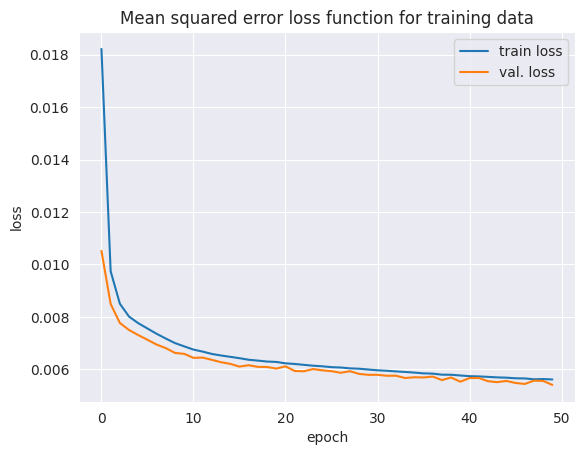

In [91]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Mean squared error loss function for training data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','val. loss'], loc='upper right')
plt.show()

# Plot digits

In [12]:
decoded_data = autoencoder.predict(x_test)

215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
def bins(n, list):
    bins = []

    list = sorted(list)

    last = list[-1]
    k = np.min(list)
    while k < last:
        bins.append(k)
        k += (last - list[0])/n


    return bins
def paint(key, m, list):
    biny = bins(m, list)
    plt.hist(list, bins=biny, color='blue')
    plt.title(keys[key])
    plt.show()
decoded_data.shape

(6863, 183)

# Read background data

In [14]:
data = np.load("new_background_data.npy", allow_pickle=True)
keys = list(data.item().keys())
max_length = max([len(data.item().get(key)) for key in keys])
signal_data = {}

for key in keys:
    signal_data[key] = data.item().get(key)


def padding_data(combo):
    for key in keys:
        combo[key] = np.pad(combo[key], (0, max_length - len(combo[key])), mode='constant', constant_values=0)
    return combo


signal_data = padding_data(signal_data)
signal_matrix = np.array([values for values in signal_data.values()])
print(signal_matrix.shape)
signal_matrix = signal_matrix.T

(183, 108457)


In [15]:
#clean_signal_matrix = signal_matrix[:,~np.all(np.isnan(signal_matrix), axis=0)]


In [16]:
#clean_signal_matrix.shape

# Reshape background data

In [17]:
xs_train, xs_test = train_test_split(signal_matrix, test_size=0.2, random_state=42)
print(xs_train.shape)
print(xs_test.shape)

(86765, 183)
(21692, 183)


# Calculate the losses

In [18]:
signal_output = autoencoder.predict(xs_test)

678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
def paint(key, m, list, list2):
    fig = plt.figure()
    biny = bins(m, list2)
    plt.hist(list, bins=biny, color='blue')
    plt.hist(list2, bins=biny, color='green', alpha=0.5)
    plt.title(keys[key])
    plt.show()
    return fig

In [20]:
losses = keras.losses.mean_squared_error(decoded_data, x_test)
fashion_losses = keras.losses.mean_squared_error(signal_output, xs_test)

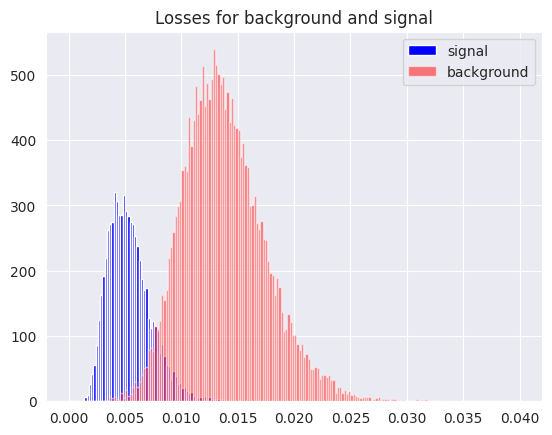

In [21]:
plt.hist(losses,bins=200,range=(0,0.04),label="signal",alpha=1, color='blue')
plt.hist(fashion_losses,bins=200,range=(0,0.04),label="background",alpha=0.5, color='red')
plt.title("Losses for background and signal")
plt.legend()
#plt.yscale('log')
plt.savefig(f'518-128 E:{epochs}, bach:{batch_size}, dim:{encoding_dim}.png')
plt.show()

In [22]:
losses_signal = keras.losses.mean_squared_error(autoencoder.predict(traning_matrix) , traning_matrix)
#print(losses[0:20])
background_losses = keras.losses.mean_squared_error(autoencoder.predict(signal_matrix), signal_matrix)

715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3390/3390 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [23]:
def gauss(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))


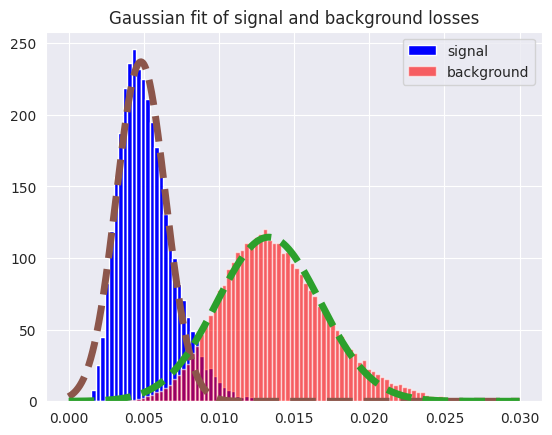

In [90]:
from scipy.optimize import curve_fit, fsolve

counts, bins, patches = plt.hist(losses_signal, bins=100, range=(0,0.03), label="signal", density=True, alpha=1, color='b',)
counts2, bins2, patches2 = plt.hist(background_losses, bins=100, range=(0,0.03), label="background", density=True, alpha=0.6, color='r')


bin_centers = (bins[:-1] + bins[1:]) / 2
popt, pcov = curve_fit(gauss, bin_centers, counts)

bin_centers2 = (bins2[:-1] + bins2[1:]) / 2
popt2, pcov2 = curve_fit(gauss, bin_centers2, counts2)

x_fit = np.linspace(bins[0], bins[-1], 1000)
y_fit = gauss(x_fit, *popt)
plt.plot(x_fit, y_fit, color='tab:brown', linewidth=5, ls='--')
x_fit2 = np.linspace(bins2[0], bins2[-1], 1000)
y_fit2 = gauss(x_fit2, *popt2)
plt.plot(x_fit2, y_fit2, color='tab:green', linewidth=5, ls='--')
plt.title("Gaussian fit of signal and background losses")
plt.legend()
plt.show()


In [26]:
a1, mu1, sigma1 = popt
a2, mu2, sigma2 = popt2

def difference(x, a1, mu1, sigma1, a2, mu2, sigma2):
    return gauss(x, a1, mu1, sigma1) - gauss(x, a2, mu2, sigma2)

intersection = fsolve(difference, x0=(mu1+mu2)/2, args=(a1, mu1, sigma1, a2, mu2, sigma2))
print(intersection)

[0.0080162]


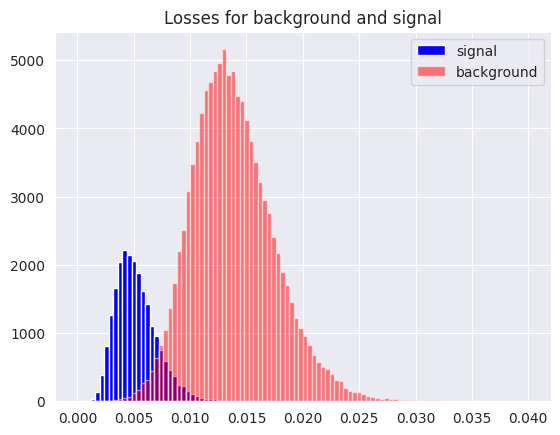

In [76]:
plt.hist(losses_signal,bins=100,range=(0,0.04),label="signal",alpha=1, color='blue')
plt.hist(background_losses,bins=100,range=(0,0.04),label="background",alpha=0.5, color='red')
plt.title("Losses for background and signal")
plt.legend()
#plt.yscale('log')
plt.savefig(f'518-128 E:{epochs}, bach:{batch_size}, dim:{encoding_dim}.png')
plt.show()

In [77]:
np.save("signal_loss.npy", losses_signal)
np.save("background_loss.npy", background_losses)

In [29]:
keep = np.load("keep_data.npy", allow_pickle=True)
keys = list(keep.item().keys())
max_length = max([len(keep.item().get(key)) for key in keys])
keep_data = {}

for key in keys:
    keep_data[key] = keep.item().get(key)

In [30]:
len(losses_signal)

22876

In [31]:
losses_signal = losses_signal.numpy()

In [32]:
len(losses_signal)


22876

In [33]:
background_losses = background_losses.numpy()

In [34]:
len(background_losses)

108457

In [35]:
losses_signal

array([0.0051427 , 0.00651377, 0.00274332, ..., 0.0116381 , 0.00903039,
       0.00946819])

In [36]:
weight = keep_data['weight_lumi_xsec']
weight_signal = weight[:len(losses_signal)]
weight_background = weight[len(losses_signal):]

In [37]:
signal_dict = {}
background_dict = {}

In [40]:
keys = list(training_data.keys())

In [41]:
keys

['met_met',
 'lep_Pt_0',
 'lep_E_0',
 'lep_Eta_0',
 'lep_sigd0PV_0',
 'lep_Z0SinTheta_0',
 'lep_Pt_1',
 'lep_Eta_1',
 'lep_sigd0PV_1',
 'lep_Z0SinTheta_1',
 'lep_z0_1',
 'tau_pt_0',
 'tau_eta_0',
 'tau_E_0',
 'tau_width_0',
 'tau_BDTJetScore_0',
 'tau_BDTEleScoreSigTrans_0',
 'tau_BDTJetScoreSigTrans_0',
 'tau_RNNJetScoreSigTrans_0',
 'Mll01',
 'Ptll01',
 'DRll01',
 'nJets_OR',
 'HT',
 'HT_lep',
 'HT_jets',
 'lead_jetPt',
 'lead_jetEta',
 'lead_jetE',
 'sublead_jetE',
 'p_DR_l1_t1',
 'p_DR_l2_t1',
 'p_Dphi_l1_t1',
 'p_Dphi_l2_t1',
 'p_invMass_l1_t1',
 'p_invMass_l2_t1',
 'p_invMass_j1_j2',
 'p_Deta_j1_j2',
 'p_DR_j1_j2',
 'p_Dphi_l1_j1',
 'p_Dphi_l2_j1',
 'p_Deta_l1_j1',
 'p_Deta_l1_j2',
 'p_Deta_l2_j1',
 'p_Deta_l2_j2',
 'p_DR_l1_j1',
 'p_DR_l1_j2',
 'p_DR_l2_j1',
 'p_DR_l2_j2',
 'p_invMass_l1_j1',
 'p_invMass_l1_j2',
 'p_invMass_l2_j1',
 'p_drCloserLepToTau',
 'p_detaCloserJetToTau',
 'p_detaCloserLepToTau',
 'p_drCloserJetToTau',
 'p_invMCloserJetToTau',
 'p_invMCloserLepToTau',
 'p

In [44]:
for key in keys:
    arr1 = []
    arr2 = []
    for i in range(len(training_data[key])):
         arr1.append(training_data[key][i] * weight_signal[i])
    signal_dict[key] = np.array(arr1)
    for j in range(len(signal_data[key])):
        arr2.append(signal_data[key][j] * weight_background[j])
    background_dict[key] = np.array(arr2)

In [60]:
def bins(n, list):
    bins = []

    list = sorted(list)

    last = list[-1]
    k = np.min(list)
    while k < last:
        bins.append(k)
        k += (last - list[0])/n


    return bins

In [61]:
biny = bins(100, traning_data[keys[0]])

In [72]:
np.mean(background_dict[keys[0]])

0.003619769716841164

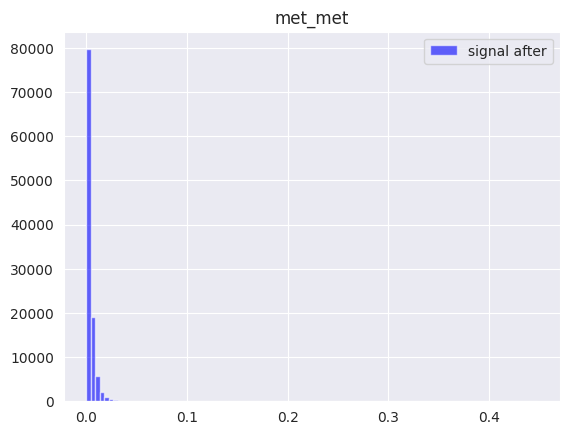

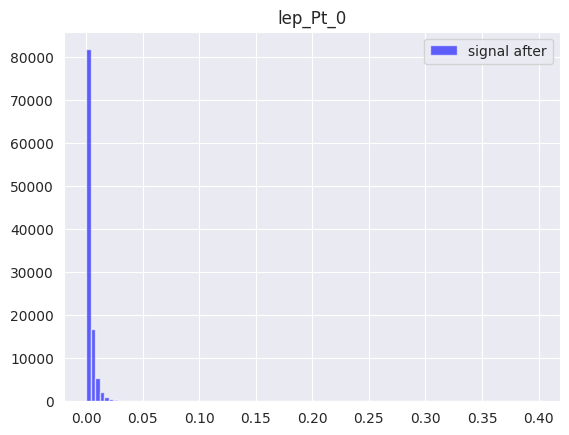

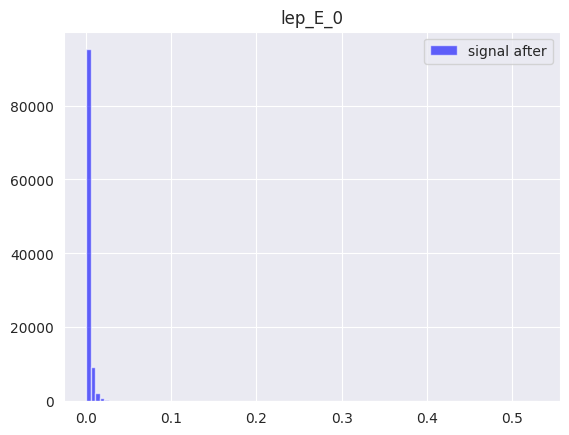

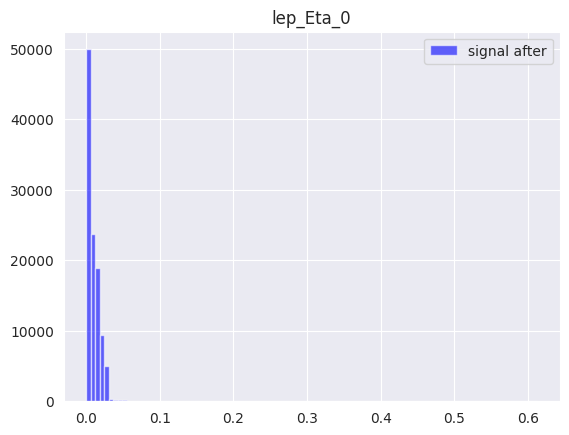

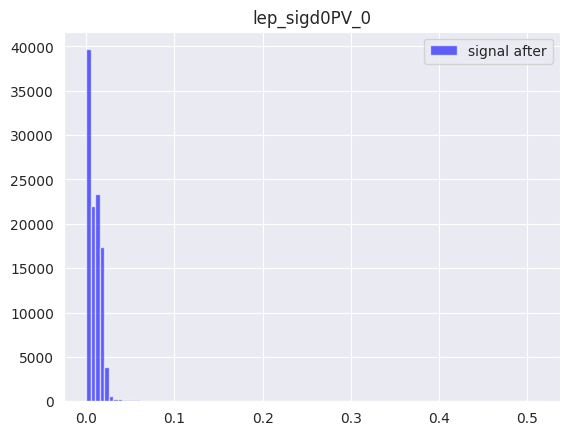

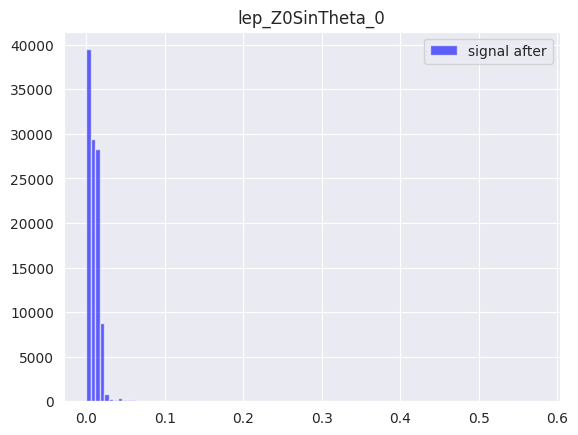

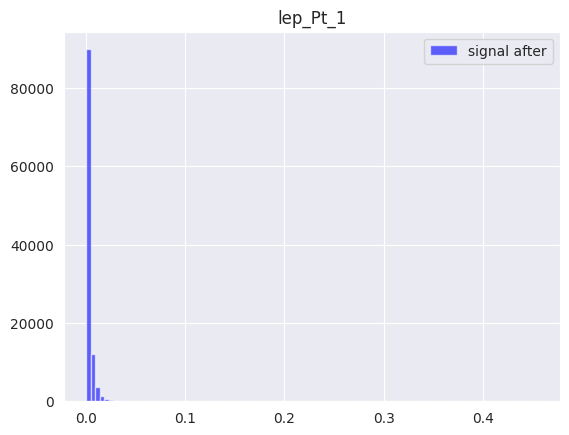

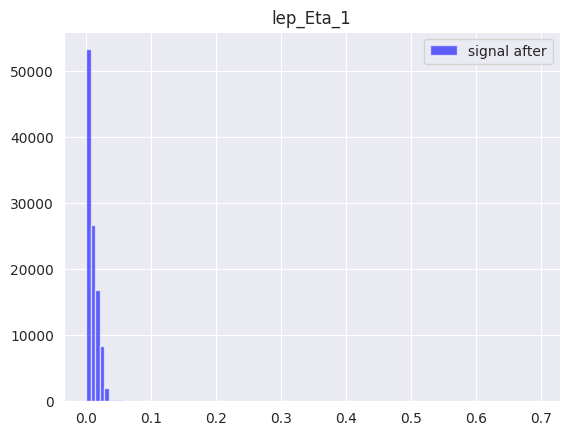

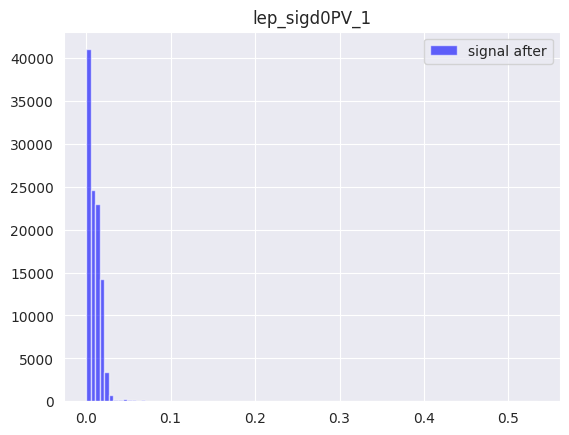

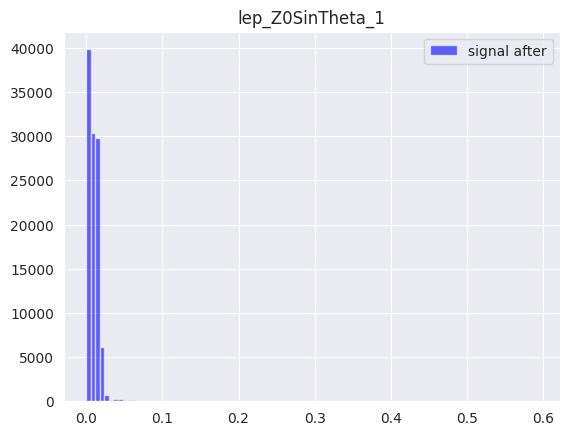

"from matplotlib.backends.backend_pdf import PdfPages\n\npp = PdfPages('plots_after_first_cleaning_background.pdf') #po wyrzuceniu pasujacych wykresow\nfor i in range(10):\n    fig = paint(i, 100, x_test[:,i], decoded_data[:,i])\n    plt.savefig(pp, format='pdf')\npp.close()"

In [71]:
for i in range(10):
    biny = bins(100, signal_dict[keys[i]])
    plt.hist(signal_dict[keys[i]],bins=biny,label="signal before",alpha=0.5, color='red')
    biny2 = bins(100, background_dict[keys[i]])
    plt.hist(background_dict[keys[i]],bins=biny2,label="signal after",alpha=0.6, color='blue')
    plt.title(keys[i])
    plt.legend()
    plt.show()
'''from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('plots_after_first_cleaning_background.pdf') #po wyrzuceniu pasujacych wykresow
for i in range(10):
    fig = paint(i, 100, x_test[:,i], decoded_data[:,i])
    plt.savefig(pp, format='pdf')
pp.close()'''

In [68]:
signal_dict['weight_lumi_xsec'] = weight_signal
background_dict['weight_lumi_xsec'] = weight_background


In [73]:
import uproot

file = uproot.open("/home/szymon/ML_ex/autoencoding_pp/new_bkg/signal.root")
file2 = uproot.open("/home/szymon/ML_ex/autoencoding_pp/new_bkg/VV_org.root")
#file3 = uproot.open("/home/szymon/ML_ex/autoencoding_pp/new_traning/VV_bkg1.root")
#file4 = uproot.open("/home/szymon/ML_ex/autoencoding_pp/new_traning/VV_bkg2.root")

branch1 = file['nominal'].arrays(library="np")
branch2 = file2['nominal'].arrays(library="np")

branch1['Losses'] = losses_signal
branch2['Losses'] = background_losses



In [75]:
np.save("org_signal_with_lossses.npy", branch1)
np.save("org_background_with_losses.npy", branch2)

In [74]:
np.save("model_signal_data.npy", signal_dict)
np.save("model_background_data.npy", background_dict)

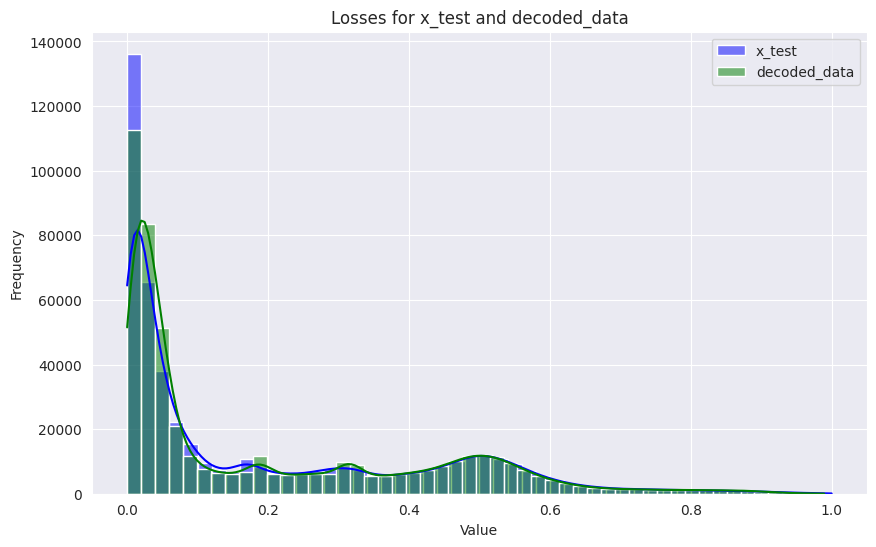

In [40]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(x_test.flatten(), bins=50, kde=True, color='blue', label='x_test', alpha=0.5)
sns.histplot(decoded_data.flatten(), bins=50, kde=True, color='green', label='decoded_data', alpha=0.5)
plt.title('Losses for x_test and decoded_data')
plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [41]:
def visualize_reconstruction_errors(autoencoder, data):
    decoded_data = autoencoder.predict(data)
    errors = np.mean(np.square(data - decoded_data), axis=1)
    plt.figure(figsize=(10, 5))
    plt.hist(errors, bins=50)
    plt.xlabel('Reconstruction error')
    plt.ylabel('Frequency')
    plt.show()

678/678 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


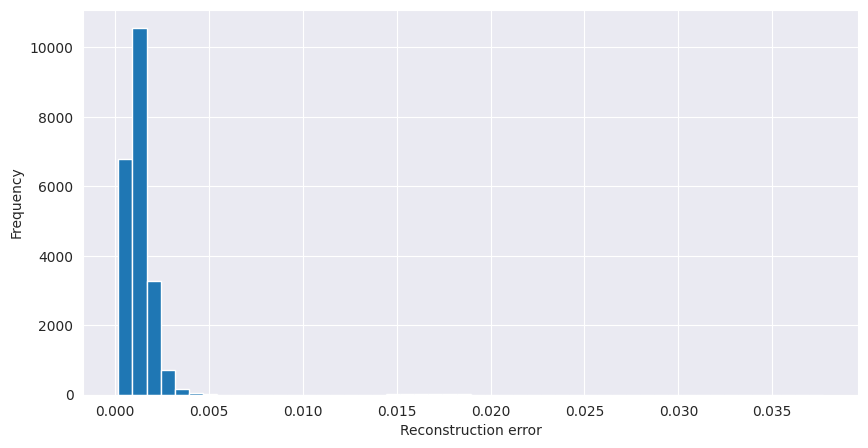

In [42]:
visualize_reconstruction_errors(autoencoder, xs_test)